In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.drop(['customerID'], axis=1,inplace=True)

In [6]:
df.shape

(7043, 20)

In [7]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [9]:
def replace_yes_no(input_string):
    replacements = {'yes': 1, 'no': 0}
    return replacements.get(input_string.lower(), input_string)

In [10]:
df['Churn'] = df['Churn'].apply(replace_yes_no)

In [11]:
df['Churn'].value_counts(normalize=True)

Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

In [12]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,0.265370
std,0.368612,24.559481,30.090047,0.441561
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,0.000000
50%,0.000000,29.000000,70.350000,0.000000
75%,0.000000,55.000000,89.850000,1.000000
max,1.000000,72.000000,118.750000,1.000000


In [14]:
df['TotalCharges'].nunique()

6531

In [15]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].isnull().sum()

11

In [16]:
df_null = df[df['TotalCharges'].isnull() == True]

In [17]:
df_null

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,0
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,0
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,0
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,0
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,0
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,0
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,0
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,0
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,0
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,0


In [18]:
df = df[df['TotalCharges'].isnull() == False]

In [19]:
df.isnull().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

<Axes: ylabel='TotalCharges'>

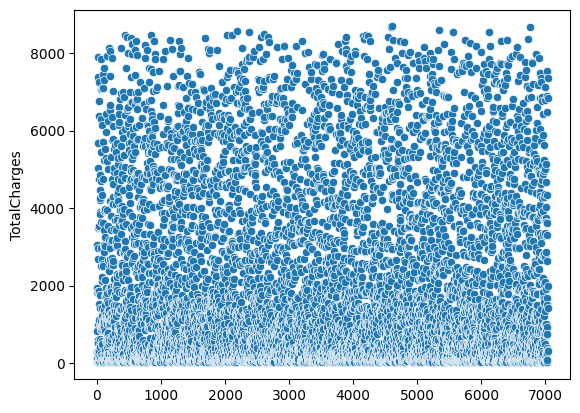

In [20]:
sns.scatterplot(df['TotalCharges'])

In [21]:
df['PhoneService'].value_counts()

PhoneService
Yes    6352
No      680
Name: count, dtype: int64

In [22]:
df['MultipleLines'].value_counts()

MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64

In [23]:
3385 + 2967

6352

In [24]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [25]:
df.drop(['PhoneService'], axis=1, inplace=True)

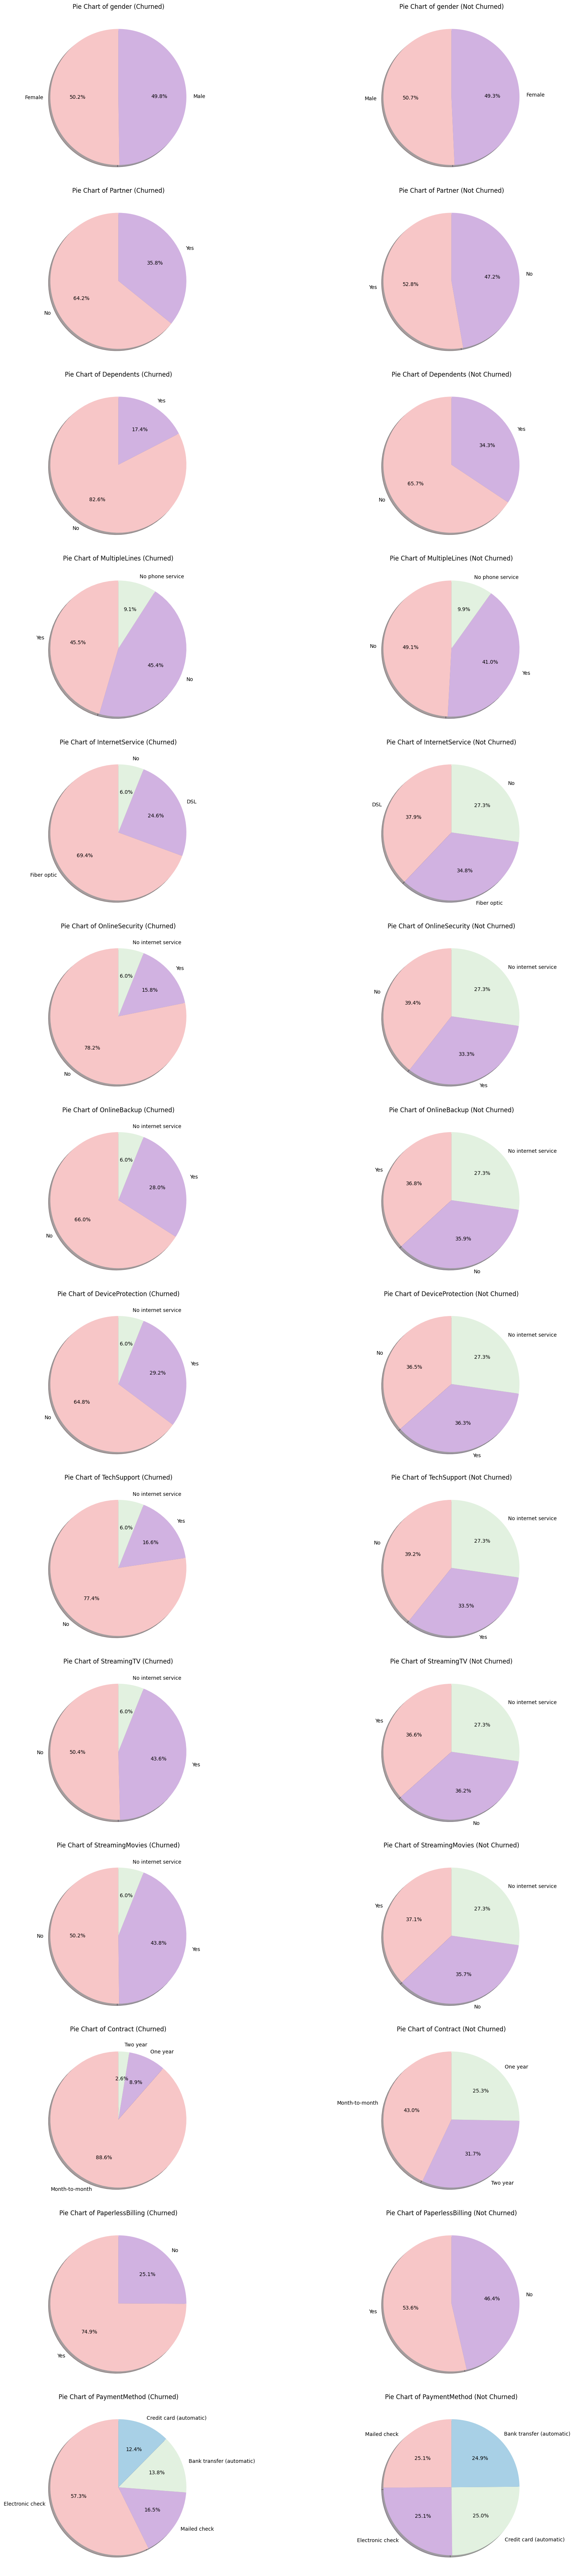

In [26]:
df_churned = df[df['Churn'] == 1]
df_not_churned = df[df['Churn'] == 0]

categorical_cols = df.select_dtypes(include='object').columns
existing_cols = [col for col in categorical_cols if col in df.columns]

fig, axes = plt.subplots(nrows=len(existing_cols), ncols=2, figsize=(20, len(existing_cols)*5))

if len(existing_cols) == 1:
    axes = [axes]

colors = [
    '#f7c6c7',  # light pink
    '#d1b2e1',  # lavender
    '#e2f1e0',  # light mint green
    '#a8d0e6'   # soft sky blue
]

for idx, col in enumerate(existing_cols):
    value_counts_churned = df_churned[col].value_counts()
    axes[idx, 0].pie(
        value_counts_churned,
        labels=value_counts_churned.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors[:len(value_counts_churned)],
        shadow=True
    )
    axes[idx, 0].set_title(f'Pie Chart of {col} (Churned)')

    value_counts_not_churned = df_not_churned[col].value_counts()
    axes[idx, 1].pie(
        value_counts_not_churned,
        labels=value_counts_not_churned.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors[:len(value_counts_not_churned)],
        shadow=True
    )
    axes[idx, 1].set_title(f'Pie Chart of {col} (Not Churned)')
    
plt.tight_layout()
plt.show()


c:\Users\LAPTOP LAB\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\LAPTOP LAB\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\LAPTOP LAB\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\LAPTOP LAB\AppData\Local\Programs\Python\

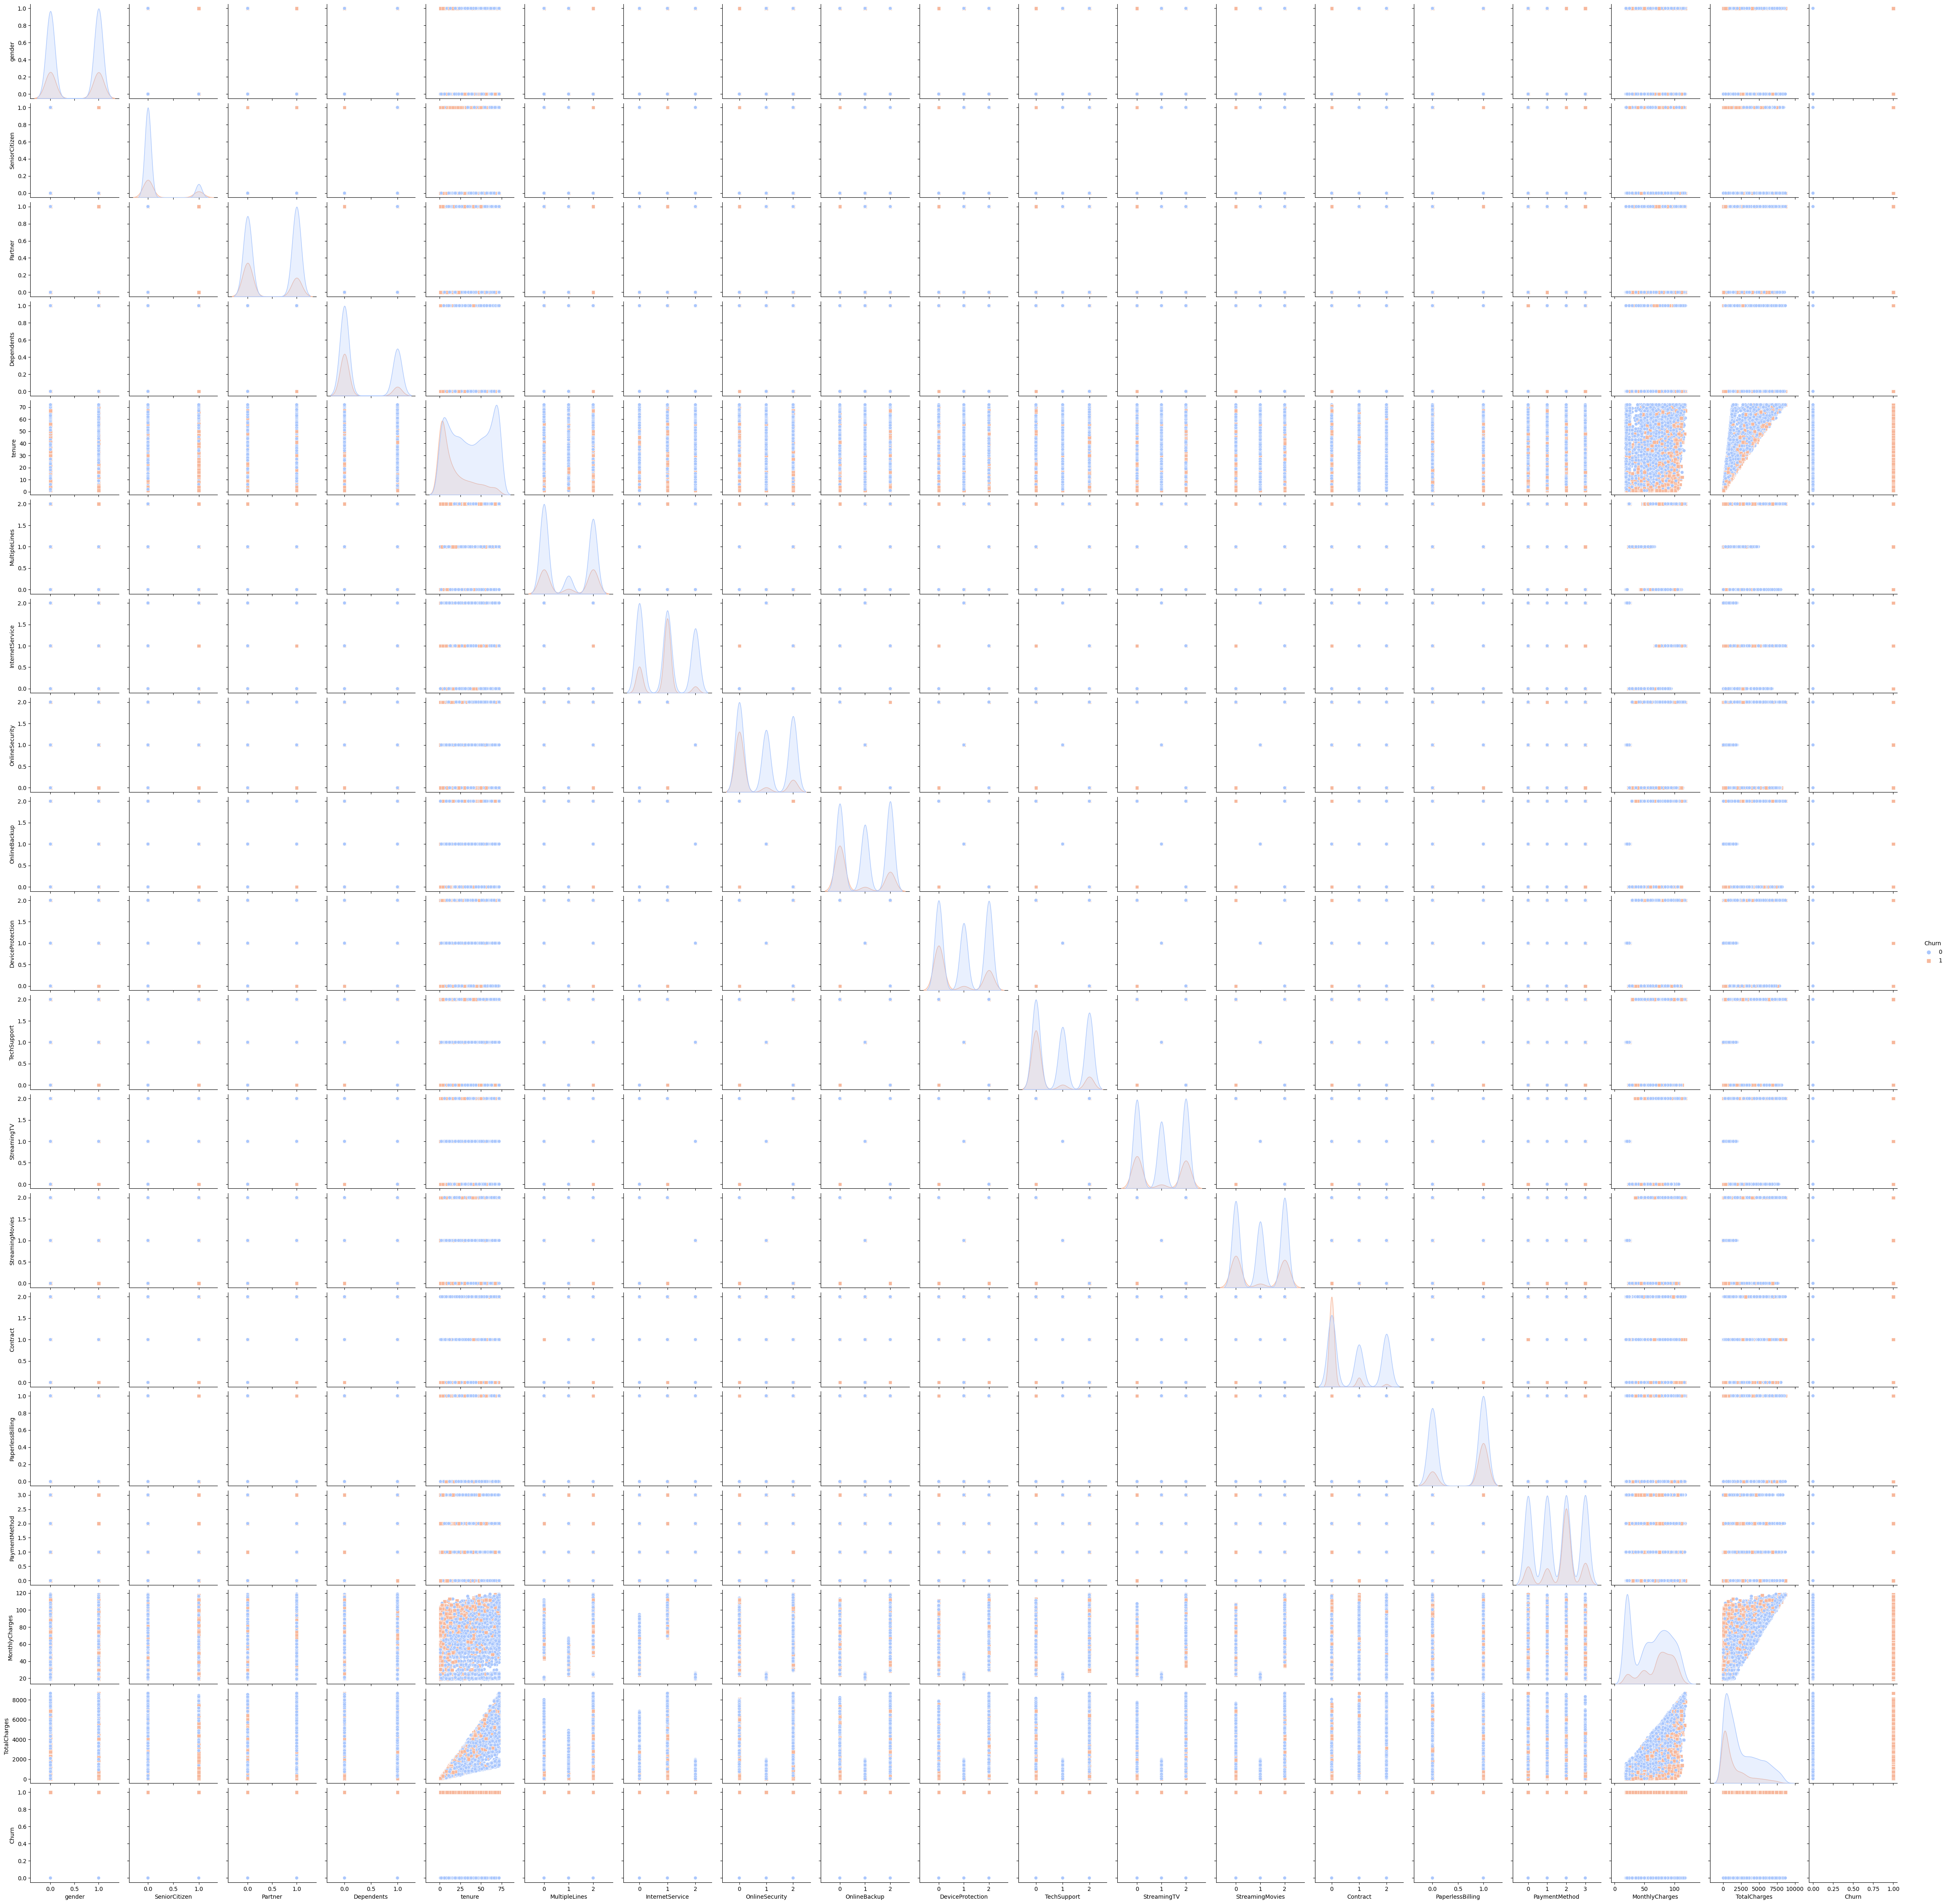

In [27]:
for col in df.select_dtypes(include='object').columns:
    df[col] = pd.Categorical(df[col]).codes

sns.pairplot(df, hue='Churn', vars=df.select_dtypes(include='number').columns, palette='coolwarm', markers=["o", "s"])

plt.show()


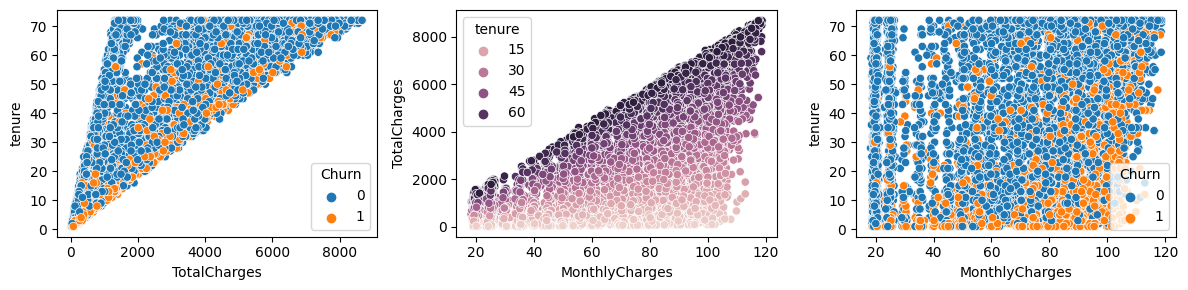

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

sns.scatterplot(x=df['TotalCharges'], y=df['tenure'], hue=df['Churn'], ax=axes[0])
sns.scatterplot(x=df['MonthlyCharges'], y=df['TotalCharges'], hue=df['tenure'], ax=axes[1])
sns.scatterplot(x=df['MonthlyCharges'], y=df['tenure'], hue=df['Churn'], ax=axes[2])

plt.tight_layout()
plt.show()


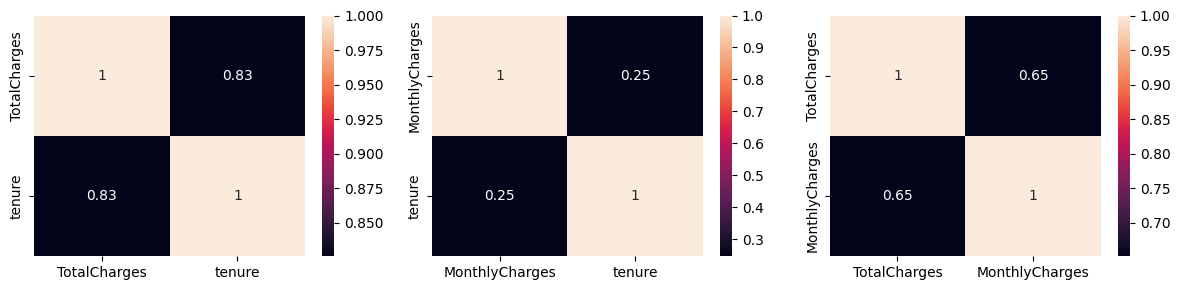

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

sns.heatmap(df[['TotalCharges','tenure']].corr(),annot=True, ax=axes[0])
sns.heatmap(df[['MonthlyCharges','tenure']].corr(),annot=True,ax=axes[1])
sns.heatmap(df[['TotalCharges','MonthlyCharges']].corr(),annot=True, ax=axes[2])

plt.tight_layout()
plt.show()


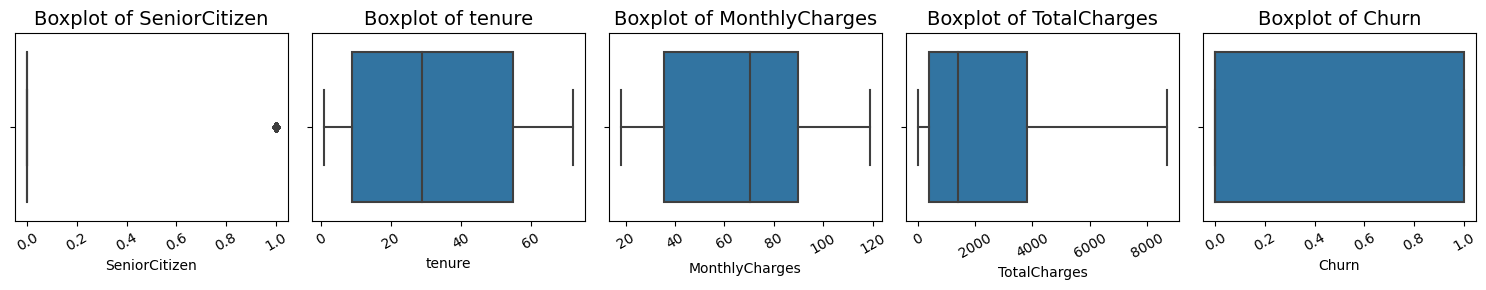

In [30]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    sns.boxplot(data=df, x=col, ax=axes[idx])
    axes[idx].set_title(f'Boxplot of {col}', fontsize=14)
    axes[idx].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()


In [31]:
columns = df.columns

# Check the number of unique values for each column
for col in columns:
    num_unique = df[col].nunique()  # Get the number of unique values
    print(f"Column '{col}' has {num_unique} unique values.")


Column 'gender' has 2 unique values.
Column 'SeniorCitizen' has 2 unique values.
Column 'Partner' has 2 unique values.
Column 'Dependents' has 2 unique values.
Column 'tenure' has 72 unique values.
Column 'MultipleLines' has 3 unique values.
Column 'InternetService' has 3 unique values.
Column 'OnlineSecurity' has 3 unique values.
Column 'OnlineBackup' has 3 unique values.
Column 'DeviceProtection' has 3 unique values.
Column 'TechSupport' has 3 unique values.
Column 'StreamingTV' has 3 unique values.
Column 'StreamingMovies' has 3 unique values.
Column 'Contract' has 3 unique values.
Column 'PaperlessBilling' has 2 unique values.
Column 'PaymentMethod' has 4 unique values.
Column 'MonthlyCharges' has 1584 unique values.
Column 'TotalCharges' has 6530 unique values.
Column 'Churn' has 2 unique values.


In [32]:
dummy_df = pd.get_dummies(df, drop_first=True)

In [33]:
dummy_df

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [34]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaled_data = scaler.fit_transform(dummy_df)
scaled_df = pd.DataFrame(scaled_data, columns=dummy_df.columns)
print(scaled_df)

      gender  SeniorCitizen  Partner  Dependents    tenure  MultipleLines  \
0       -1.0            0.0      1.0         0.0 -0.608696            0.0   
1        0.0            0.0      0.0         0.0  0.108696           -0.5   
2        0.0            0.0      0.0         0.0 -0.586957           -0.5   
3        0.0            0.0      0.0         0.0  0.347826            0.0   
4       -1.0            0.0      0.0         0.0 -0.586957           -0.5   
...      ...            ...      ...         ...       ...            ...   
7027     0.0            0.0      1.0         1.0 -0.108696            0.5   
7028    -1.0            0.0      1.0         1.0  0.934783            0.5   
7029    -1.0            0.0      1.0         1.0 -0.391304            0.0   
7030     0.0            1.0      1.0         0.0 -0.543478            0.5   
7031     0.0            0.0      0.0         0.0  0.804348           -0.5   

      InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  \
0 

In [35]:
scaled_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,-1.0,0.0,1.0,0.0,-0.608696,0.0,-1.0,-0.5,0.5,-0.5,-0.5,-0.5,-0.5,0.0,0.0,0.0,-0.746200,-0.403038,0.0
1,0.0,0.0,0.0,0.0,0.108696,-0.5,-1.0,0.5,-0.5,0.5,-0.5,-0.5,-0.5,1.0,-1.0,1.0,-0.246891,0.145000,0.0
2,0.0,0.0,0.0,0.0,-0.586957,-0.5,-1.0,0.5,0.5,-0.5,-0.5,-0.5,-0.5,0.0,0.0,1.0,-0.304007,-0.379963,1.0
3,0.0,0.0,0.0,0.0,0.347826,0.0,-1.0,0.5,-0.5,0.5,0.5,-0.5,-0.5,1.0,-1.0,-2.0,-0.516813,0.130633,0.0
4,-1.0,0.0,0.0,0.0,-0.586957,-0.5,0.0,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,0.0,0.0,0.0,0.006449,-0.367144,1.0


In [36]:
x = scaled_df.drop('Churn', axis=1)
y = scaled_df['Churn']

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [38]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5274, 18), (1758, 18), (5274,), (1758,))

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [40]:
def train_and_evaluate_models(x_train, y_train, x_test, y_test, models=None):
    if models is None:
        models = ['LogisticRegression', 'RandomForest', 'XGBoost']
    
    model_performance = {}
    
    if 'LogisticRegression' in models:
        logistic_model = LogisticRegression(random_state=42)
        logistic_model.fit(x_train, y_train)
        y_pred = logistic_model.predict(x_test)
        model_performance['LogisticRegression'] = {
            'accuracy': accuracy_score(y_test, y_pred),
            'precision': precision_score(y_test, y_pred),
            'recall': recall_score(y_test, y_pred),
            'roc_auc': roc_auc_score(y_test, logistic_model.predict_proba(x_test)[:, 1]),
            'confusion_matrix': confusion_matrix(y_test, y_pred),
            'classification_report': classification_report(y_test, y_pred, output_dict=True)
        }
    
    if 'RandomForest' in models:
        rf_model = RandomForestClassifier(random_state=42)
        rf_model.fit(x_train, y_train)
        y_pred = rf_model.predict(x_test)
        model_performance['RandomForest'] = {
            'accuracy': accuracy_score(y_test, y_pred),
            'precision': precision_score(y_test, y_pred),
            'recall': recall_score(y_test, y_pred),
            'roc_auc': roc_auc_score(y_test, rf_model.predict_proba(x_test)[:, 1]),
            'confusion_matrix': confusion_matrix(y_test, y_pred),
            'classification_report': classification_report(y_test, y_pred, output_dict=True)
        }
    
    if 'XGBoost' in models:
        xgb_model = xgb.XGBClassifier(random_state=42)
        xgb_model.fit(x_train, y_train)
        y_pred = xgb_model.predict(x_test)
        model_performance['XGBoost'] = {
            'accuracy': accuracy_score(y_test, y_pred),
            'precision': precision_score(y_test, y_pred),
            'recall': recall_score(y_test, y_pred),
            'roc_auc': roc_auc_score(y_test, xgb_model.predict_proba(x_test)[:, 1]),
            'confusion_matrix': confusion_matrix(y_test, y_pred),
            'classification_report': classification_report(y_test, y_pred, output_dict=True)
        }
    
    return model_performance


In [41]:
performance = train_and_evaluate_models(x_train, y_train,x_test,y_test, models=['LogisticRegression', 'RandomForest', 'XGBoost'])

performance_dict = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'ROC-AUC': [],
    'Confusion Matrix': [],
    'Classification Report': []
}

for model_name, metrics in performance.items():
    performance_dict['Model'].append(model_name)
    performance_dict['Accuracy'].append(metrics['accuracy'])
    performance_dict['Precision'].append(metrics['precision'])
    performance_dict['Recall'].append(metrics['recall'])
    performance_dict['ROC-AUC'].append(metrics['roc_auc'])
    performance_dict['Confusion Matrix'].append(metrics['confusion_matrix'])
    performance_dict['Classification Report'].append(metrics['classification_report'])

performance_df = pd.DataFrame(performance_dict)

In [42]:
performance_df.head()

,Model,Accuracy,Precision,Recall,ROC-AUC,Confusion Matrix,Classification Report
0,LogisticRegression,0.792947,0.624339,0.515284,0.829624,"[[1158, 142], [222, 236]]","{'0.0': {'precision': 0.8391304347826087, 'rec..."
1,RandomForest,0.783276,0.607843,0.473799,0.808719,"[[1160, 140], [241, 217]]","{'0.0': {'precision': 0.8279800142755175, 'rec..."
2,XGBoost,0.780432,0.587805,0.526201,0.811977,"[[1131, 169], [217, 241]]","{'0.0': {'precision': 0.8390207715133531, 'rec..."


In [43]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [44]:
rus = RandomUnderSampler()
X_RUS, y_RUS = rus.fit_resample(x, y)

ros = RandomOverSampler()
X_ROS, y_ROS = ros.fit_resample(x, y)

sm = SMOTE()
X_SMOTE, y_SMOTE = sm.fit_resample(x, y)

In [45]:
if len(y_RUS.shape) > 1:
    y_RUS = y_RUS.ravel()

x_train_rus, x_test_rus, y_train_rus, y_test_rus = train_test_split(X_RUS, y_RUS, test_size=0.20, random_state=42)

In [46]:
performance = train_and_evaluate_models(x_train_rus, y_train_rus,x_test_rus,y_test_rus, models=['LogisticRegression', 'RandomForest', 'XGBoost'])

performance_dict = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'ROC-AUC': [],
    'Confusion Matrix': [],
    'Classification Report': []
}

for model_name, metrics in performance.items():
    performance_dict['Model'].append(model_name)
    performance_dict['Accuracy'].append(metrics['accuracy'])
    performance_dict['Precision'].append(metrics['precision'])
    performance_dict['Recall'].append(metrics['recall'])
    performance_dict['ROC-AUC'].append(metrics['roc_auc'])
    performance_dict['Confusion Matrix'].append(metrics['confusion_matrix'])
    performance_dict['Classification Report'].append(metrics['classification_report'])

performance_df_rus = pd.DataFrame(performance_dict)
performance_df_rus.head()

,Model,Accuracy,Precision,Recall,ROC-AUC,Confusion Matrix,Classification Report
0,LogisticRegression,0.770053,0.746867,0.807588,0.851381,"[[278, 101], [71, 298]]","{'0.0': {'precision': 0.7965616045845272, 'rec..."
1,RandomForest,0.750000,0.738220,0.764228,0.832922,"[[279, 100], [87, 282]]","{'0.0': {'precision': 0.7622950819672131, 'rec..."
2,XGBoost,0.752674,0.733503,0.783198,0.827920,"[[274, 105], [80, 289]]","{'0.0': {'precision': 0.7740112994350282, 'rec..."


In [47]:
if len(y_ROS.shape) > 1:
    y_ROS = y_ROS.ravel()

x_train_ros, x_test_ros, y_train_ros, y_test_ros = train_test_split(X_ROS, y_ROS, test_size=0.20, random_state=42)

In [48]:
performance = train_and_evaluate_models(x_train_ros, y_train_ros,x_test_ros,y_test_ros, models=['LogisticRegression', 'RandomForest', 'XGBoost'])

performance_dict = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'ROC-AUC': [],
    'Confusion Matrix': [],
    'Classification Report': []
}

for model_name, metrics in performance.items():
    performance_dict['Model'].append(model_name)
    performance_dict['Accuracy'].append(metrics['accuracy'])
    performance_dict['Precision'].append(metrics['precision'])
    performance_dict['Recall'].append(metrics['recall'])
    performance_dict['ROC-AUC'].append(metrics['roc_auc'])
    performance_dict['Confusion Matrix'].append(metrics['confusion_matrix'])
    performance_dict['Classification Report'].append(metrics['classification_report'])

performance_df_ros = pd.DataFrame(performance_dict)
performance_df_ros.head()

,Model,Accuracy,Precision,Recall,ROC-AUC,Confusion Matrix,Classification Report
0,LogisticRegression,0.770571,0.744063,0.822157,0.846453,"[[746, 291], [183, 846]]","{'0.0': {'precision': 0.8030139935414424, 'rec..."
1,RandomForest,0.889158,0.857143,0.932945,0.958273,"[[877, 160], [69, 960]]","{'0.0': {'precision': 0.927061310782241, 'reca..."
2,XGBoost,0.848984,0.804071,0.921283,0.919452,"[[806, 231], [81, 948]]","{'0.0': {'precision': 0.9086809470124013, 'rec..."


In [49]:
if len(y_SMOTE.shape) > 1:
    y_SMOTE = y_SMOTE.ravel()

x_train_smote, x_test_smote, y_train_smote, y_test_smote = train_test_split(X_SMOTE, y_SMOTE, test_size=0.20, random_state=42)



In [50]:
performance = train_and_evaluate_models(x_train_smote, y_train_smote,x_test_smote,y_test_smote, models=['LogisticRegression', 'RandomForest', 'XGBoost'])

performance_dict = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'ROC-AUC': [],
    'Confusion Matrix': [],
    'Classification Report': []
}

for model_name, metrics in performance.items():
    performance_dict['Model'].append(model_name)
    performance_dict['Accuracy'].append(metrics['accuracy'])
    performance_dict['Precision'].append(metrics['precision'])
    performance_dict['Recall'].append(metrics['recall'])
    performance_dict['ROC-AUC'].append(metrics['roc_auc'])
    performance_dict['Confusion Matrix'].append(metrics['confusion_matrix'])
    performance_dict['Classification Report'].append(metrics['classification_report'])

performance_df_smote = pd.DataFrame(performance_dict)
performance_df_smote.head()

,Model,Accuracy,Precision,Recall,ROC-AUC,Confusion Matrix,Classification Report
0,LogisticRegression,0.761375,0.749534,0.782313,0.839339,"[[768, 269], [224, 805]]","{'0.0': {'precision': 0.7741935483870968, 'rec..."
1,RandomForest,0.842691,0.837812,0.848397,0.915636,"[[868, 169], [156, 873]]","{'0.0': {'precision': 0.84765625, 'recall': 0...."
2,XGBoost,0.851404,0.849130,0.853256,0.929216,"[[881, 156], [151, 878]]","{'0.0': {'precision': 0.8536821705426356, 'rec..."


In [51]:
performance_df_merge = pd.concat([performance_df, performance_df_rus,performance_df_ros,performance_df_smote], axis=0)
performance_df_merge.head(20)

,Model,Accuracy,Precision,Recall,ROC-AUC,Confusion Matrix,Classification Report
0,LogisticRegression,0.792947,0.624339,0.515284,0.829624,"[[1158, 142], [222, 236]]","{'0.0': {'precision': 0.8391304347826087, 'rec..."
1,RandomForest,0.783276,0.607843,0.473799,0.808719,"[[1160, 140], [241, 217]]","{'0.0': {'precision': 0.8279800142755175, 'rec..."
2,XGBoost,0.780432,0.587805,0.526201,0.811977,"[[1131, 169], [217, 241]]","{'0.0': {'precision': 0.8390207715133531, 'rec..."
0,LogisticRegression,0.770053,0.746867,0.807588,0.851381,"[[278, 101], [71, 298]]","{'0.0': {'precision': 0.7965616045845272, 'rec..."
1,RandomForest,0.750000,0.738220,0.764228,0.832922,"[[279, 100], [87, 282]]","{'0.0': {'precision': 0.7622950819672131, 'rec..."
2,XGBoost,0.752674,0.733503,0.783198,0.827920,"[[274, 105], [80, 289]]","{'0.0': {'precision': 0.7740112994350282, 'rec..."
0,LogisticRegression,0.770571,0.744063,0.822157,0.846453,"[[746, 291], [183, 846]]","{'0.0': {'precision': 0.8030139935414424, 'rec..."
1,RandomForest,0.889158,0.857143,0.932945,0.958273,"[[877, 160], [69, 960]]","{'0.0': {'precision': 0.927061310782241, 'reca..."
2,XGBoost,0.848984,0.804071,0.921283,0.919452,"[[806, 231], [81, 948]]","{'0.0': {'precision': 0.9086809470124013, 'rec..."
0,LogisticRegression,0.761375,0.749534,0.782313,0.839339,"[[768, 269], [224, 805]]","{'0.0': {'precision': 0.7741935483870968, 'rec..."


In [52]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier(random_state=42)

param_dist = {
    'n_estimators': np.arange(10, 201, 10),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=3, random_state=42, n_jobs=-1)

random_search.fit(x_train_ros, y_train_ros) # because model did well on this data, we can use it for training

print(f"Best parameters: {random_search.best_params_}")

best_rf = random_search.best_estimator_
print(f"Test Accuracy: {best_rf.score(x_test_ros, y_test_ros):.4f}")


c:\Users\LAPTOP LAB\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
96 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
57 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LAPTOP LAB\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LAPTOP LAB\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\LAPTOP LAB\AppData\Local\Programs\Python\Python311\Lib\site-pac

Best parameters: {'n_estimators': 40, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}
Test Accuracy: 0.9061


In [53]:
import joblib

with open('random_forest_model.pkl', 'wb') as file:
    joblib.dump(random_search, file)

print("Model saved as random_forest_model.pkl using joblib")


Model saved as random_forest_model.pkl using joblib
